# Measuring Photons with Swabian

## Prequsites

In [15]:
TT.freeTimeTagger(tagger)

True

In [1]:
#run this cell if you want to be able to autoreload packages
#(meaning that you don't have to restart the kernal when you make changes to code)

%load_ext autoreload
%autoreload 2
%matplotlib inline
%run -i "SC_Prerequisites.py"

### Swabian Time Tagger Configuration

In [ ]:
## Configruation of the swabian setting the trigger levels for each channels and the input delays needed
channels = [1,2,3,4,5,6,7,8]
trigger_levels = {1:0.08, 2:0.08, 3:0.08, 4:0.08, 5:0.08, 6:0.08, 7:0.08, 8:0.08}
AA_input_delays = {1:0, 2:2000, 3:1000, 4:3000, 5:11000, 6:-20000, 7:-6000, 8:-3000}
AC_input_delays = {1:57000, 2:62000, 3:42000, 4:45000, 5:0, 6:0, 7:0, 8:0}
BC_input_delays = {1:0, 2:0, 3:0, 4:0, 5:22000, 6:-12000, 7:4000, 8:3000}
Offset_input_delays = {1:-60000, 2:-60000, 3:-60000, 4:-60000, 5:0, 6:0, 7:0, 8:0}

SC.set_input_delays(BC_input_delays, tagger)
SC.set_trigger_levels(trigger_levels, tagger)

In [ ]:
# Create Channels to see count Rates
counter_dict = {}
for channel in channels:
    counter_dict["Ch"+str(channel)] = TT.Countrate(tagger,[1])

In [ ]:
# Produce a Fake Signal
# tagger.setTestSignal(channels, False)

In [ ]:
Coin_Combs = SC.Virutal_channel_creator() # Creates a list of list of the coindient channels, with the number enter being the number of channels used. 
coinc = TT.Coincidences(tagger, Coin_Combs, coincidenceWindow=10000) # Creates all of the coincdent channells of all the combinations from Coin_combs
coinc_chans = list(coinc.getChannels())  # Creates a list of the channel numbers


## Creates a Dict of the channels and the keys being the coincdent of the channels Example {"Ch[1,2]:19. Ch[1,3]:20...., Ch[7,8]:36"}
Coin_channel_dict = {}
i = 0
for channel in coinc_chans:
    Coin_channel_dict["Ch"+str(Coin_Combs[i])] = channel
    i += 1
    
## Creates a dictonry of the channels of the Coincdent channels are actually at, so each value is a class. 
Channels_Coinc = {}
for key, channel in Coin_channel_dict.items():
    Channels_Coinc[key] = TT.Countrate(tagger,[channel])

In [6]:
Qubit_to_channels = {"B1":1, "B2":2, "B3":3, "B4":4, "C1":5, "C2":6, "C3":7, "C4":8}
Results_channels = [["B1","C1"], ["B1","C2"], ["B1","C3"], ["B1","C4"], ["B2","C1"], ["B2","C2"], ["B2","C3"], ["B2","C4"], ["B3","C1"], ["B3","C2"], ["B3","C3"], ["B3","C4"], ["B4","C1"], ["B4","C2"], ["B4","C3"], ["B4","C4"]]

## Record Counts

In [7]:
def Save_Results(results, path):
    df = pd.DataFrame(results)
    return df.to_csv(path+dt.now().strftime("%Y-%m-%d-%H-%M")+".csv")

def get_results(binwidth = 10**12, n_values = 300):
    Counter = TT.Counter(tagger, coinc_chans, binwidth = binwidth, n_values = n_values)
    time.sleep(binwidth/(10**12)*n_values)
    raw = Counter.getData()

    sum_channel_results = []
    for channel_result in Counter.getData():
        sum_channel_results.append(channel_result.sum())
    results = list(zip(Results_channels, sum_channel_results))
    return (results, sum_channel_results, raw)

In [8]:
## Counter the measure the values 
binwidth = 10**12 # in ps
n_values = 300 # binwdith * n_values = Total Time recorded

Counter = TT.Counter(tagger, coinc_chans, binwidth = binwidth, n_values = n_values)
time.sleep(binwidth/(10**12)*n_values)
Counter.getData()

sum_channel_results = []
for channel_result in Counter.getData():
    sum_channel_results.append(channel_result.sum())
results = list(zip(Results_channels, sum_channel_results))
results

[(['B1', 'C1'], 196),
 (['B1', 'C2'], 380),
 (['B1', 'C3'], 347),
 (['B1', 'C4'], 282),
 (['B2', 'C1'], 94),
 (['B2', 'C2'], 422),
 (['B2', 'C3'], 185),
 (['B2', 'C4'], 141),
 (['B3', 'C1'], 146),
 (['B3', 'C2'], 390),
 (['B3', 'C3'], 1672),
 (['B3', 'C4'], 297),
 (['B4', 'C1'], 43),
 (['B4', 'C2'], 72),
 (['B4', 'C3'], 86),
 (['B4', 'C4'], 265)]

## Present Counts / Results

In [9]:
# Turn results into a quantum object in qutip
Density_Mat = np.array(sum_channel_results).reshape(4,4)
Norm_Density = []
for row in Density_Mat:
    for i in row:
        Norm_Density.append((i/max(row))/4)
Norm_Density_Mat = np.array(Norm_Density).reshape(4,4)
q = Qobj(Norm_Density_Mat)
q

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.12894737 0.25       0.22828947 0.18552632]
 [0.0556872  0.25       0.10959716 0.08353081]
 [0.02183014 0.0583134  0.25       0.04440789]
 [0.04056604 0.06792453 0.08113208 0.25      ]]

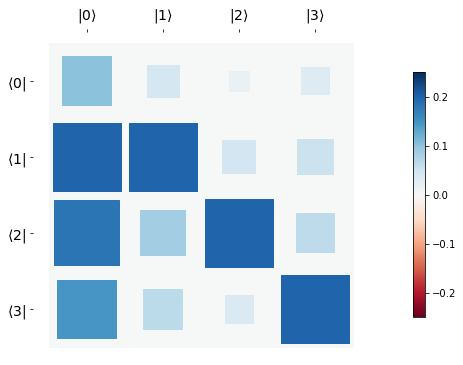

In [10]:
hinton(q);
plt.savefig("results/density_matrix_flat"+ dt.now().strftime("%Y-%m-%d-%H-%M") +".png")

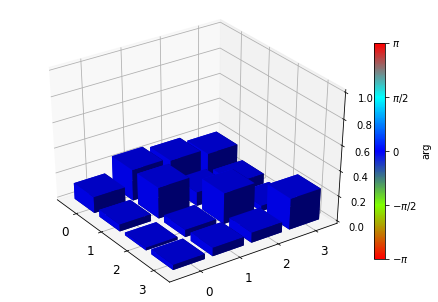

In [11]:
matrix_histogram_complex(q)
plt.savefig("results/density_matrix"+ dt.now().strftime("%Y-%m-%d-%H-%M") +".png")

In [12]:
save_path = "results/Counts_results"
Save_Results(results, save_path)

# Long Interation

In [13]:
## Counter the measure the values 
binwidth = 10**12 # in ps
n_values = 3000 # binwdith * n_values = Total Time recorded

Counter = TT.Counter(tagger, coinc_chans, binwidth = binwidth, n_values = n_values)
time.sleep(binwidth/(10**12)*n_values)
Counter.getData()

sum_channel_results = []
for channel_result in Counter.getData():
    sum_channel_results.append(channel_result.sum())
results = list(zip(Results_channels, sum_channel_results))
results

[(['B1', 'C1'], 2826),
 (['B1', 'C2'], 3482),
 (['B1', 'C3'], 3208),
 (['B1', 'C4'], 2765),
 (['B2', 'C1'], 1440),
 (['B2', 'C2'], 4762),
 (['B2', 'C3'], 1925),
 (['B2', 'C4'], 1470),
 (['B3', 'C1'], 1401),
 (['B3', 'C2'], 2626),
 (['B3', 'C3'], 13020),
 (['B3', 'C4'], 2083),
 (['B4', 'C1'], 376),
 (['B4', 'C2'], 733),
 (['B4', 'C3'], 675),
 (['B4', 'C4'], 2237)]

## Present Counts / Results

In [14]:
# Turn results into a quantum object in qutip
Density_Mat = np.array(sum_channel_results).reshape(4,4)
Norm_Density = []
for row in Density_Mat:
    for i in row:
        Norm_Density.append((i/max(row))/4)
Norm_Density_Mat = np.array(Norm_Density).reshape(4,4)
q = Qobj(Norm_Density_Mat)
q

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.20290063 0.25       0.2303274  0.19852096]
 [0.07559849 0.25       0.10106048 0.07717346]
 [0.02690092 0.05042243 0.25       0.03999616]
 [0.04202056 0.08191775 0.07543585 0.25      ]]

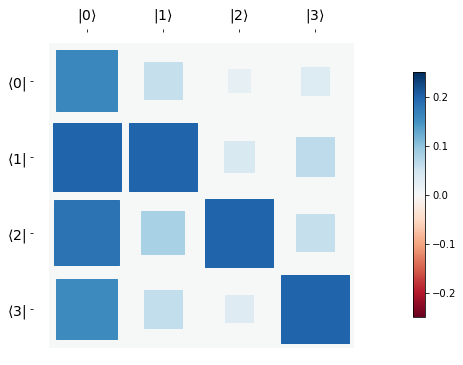

In [15]:
hinton(q);
plt.savefig("results/density_matrix_flat"+ dt.now().strftime("%Y-%m-%d-%H-%M") +".png")

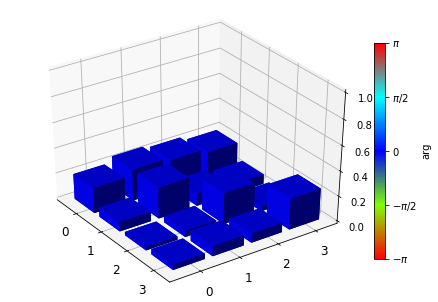

In [16]:
matrix_histogram_complex(q)
plt.savefig("results/density_matrix"+ dt.now().strftime("%Y-%m-%d-%H-%M") +".png")

In [17]:
save_path = "results/Counts_results_long_"
Save_Results(results, save_path)

In [8]:
Offset_input_delays = {1:-60000, 2:-60000, 3:-60000, 4:-60000, 5:0, 6:0, 7:0, 8:0}

SC.set_input_delays(Offset_input_delays, tagger)

# Background

In [9]:
## Counter the measure the values 
binwidth = 10**12 # in ps
n_values = 3000 # binwdith * n_values = Total Time recorded

Counter = TT.Counter(tagger, coinc_chans, binwidth = binwidth, n_values = n_values)
time.sleep(binwidth/(10**12)*n_values)
Counter.getData()

sum_channel_results = []
for channel_result in Counter.getData():
    sum_channel_results.append(channel_result.sum())
results = list(zip(Results_channels, sum_channel_results))
results

[(['B1', 'C1'], 11277),
 (['B1', 'C2'], 24225),
 (['B1', 'C3'], 41378),
 (['B1', 'C4'], 35783),
 (['B2', 'C1'], 8577),
 (['B2', 'C2'], 17789),
 (['B2', 'C3'], 30454),
 (['B2', 'C4'], 26324),
 (['B3', 'C1'], 14844),
 (['B3', 'C2'], 32482),
 (['B3', 'C3'], 55115),
 (['B3', 'C4'], 47784),
 (['B4', 'C1'], 3477),
 (['B4', 'C2'], 7573),
 (['B4', 'C3'], 12786),
 (['B4', 'C4'], 10921)]

## Present Counts / Results

In [10]:
# Turn results into a quantum object in qutip
Density_Mat = np.array(sum_channel_results).reshape(4,4)
Norm_Density = []
for row in Density_Mat:
    for i in row:
        Norm_Density.append((i/max(row))/4)
Norm_Density_Mat = np.array(Norm_Density).reshape(4,4)
q = Qobj(Norm_Density_Mat)
q

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.06813403 0.14636401 0.25       0.2161958 ]
 [0.07040947 0.14603172 0.25       0.21609641]
 [0.06733194 0.14733739 0.25       0.2167468 ]
 [0.06798451 0.14807211 0.25       0.21353433]]

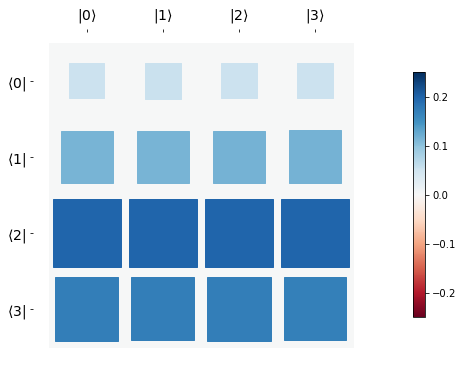

In [11]:
hinton(q);
plt.savefig("results/density_matrix_flat"+ dt.now().strftime("%Y-%m-%d-%H-%M") +".png")

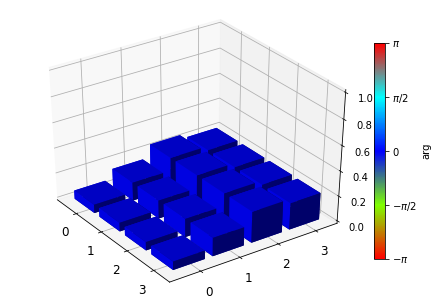

In [12]:
matrix_histogram_complex(q)
plt.savefig("results/density_matrix"+ dt.now().strftime("%Y-%m-%d-%H-%M") +".png")

In [13]:
save_path = "results/Counts_results_background_"
Save_Results(results, save_path)